## 10.Pima Indian Diabets1

<div style="text-align: right"> <b>Author : Kwang Myung Yu</b></div>
<div style="text-align: right\"> Initial upload: 2022.02.22 </div>
<div style="text-align: right\"> Last update: 2022.02.22</div>

- 출처 : https://www.kaggle.com/dogdriip/pima-indian-diabetes/notebook

In [1]:
import os
import sys
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings; warnings.filterwarnings('ignore')
plt.style.use('ggplot')
%matplotlib inline

In [2]:
colors = ["#00798c", "#d1495b", '#edae49', '#66a182', '#4a4a4a',
          '#1a508b', '#e3120b', '#c5a880', '#9F5F80', '#6F9EAF',
          '#0278ae','#F39233', '#A7C5EB', '#54E346', '#ABCE74',
        '#d6b0b1', '#58391c', '#cdd0cb', '#ffb396', '#6930c3']
sns.color_palette(colors[:10])

[(0.0, 0.4745098039215686, 0.5490196078431373),
 (0.8196078431372549, 0.28627450980392155, 0.3568627450980392),
 (0.9294117647058824, 0.6823529411764706, 0.28627450980392155),
 (0.4, 0.6313725490196078, 0.5098039215686274),
 (0.2901960784313726, 0.2901960784313726, 0.2901960784313726),
 (0.10196078431372549, 0.3137254901960784, 0.5450980392156862),
 (0.8901960784313725, 0.07058823529411765, 0.043137254901960784),
 (0.7725490196078432, 0.6588235294117647, 0.5019607843137255),
 (0.6235294117647059, 0.37254901960784315, 0.5019607843137255),
 (0.43529411764705883, 0.6196078431372549, 0.6862745098039216)]

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import f1_score, confusion_matrix, precision_recall_curve, roc_curve
from sklearn.preprocessing import StandardScaler, Binarizer
from sklearn.linear_model import LogisticRegression

In [5]:
def get_clf_eval(y_test, pred, pred_proba):
    print(f'Accuracy: {accuracy_score(y_test, pred)}')
    print(f'Confusion Matrix:\n{confusion_matrix(y_test, pred)}')
    print(f'Precision: {precision_score(y_test, pred)}, Recall: {recall_score(y_test, pred)}')
    print(f'F1: {f1_score(y_test, pred)}, AUC: {roc_auc_score(y_test, pred_proba)}')

In [6]:
def precision_recall_curve_plot(y_test, pred_proba):
    # threshold ndarray와 이 threshold에 따른 정밀도, 재현율 ndarray 추출
    precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba)
    
    # x축을 threshold값으로, y축은 정밀도, 재현율 값으로 각각 Plot 수행. 정밀도는 점선으로 표시.
    plt.figure(figsize=(8, 6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision')
    plt.plot(thresholds, recalls[0:threshold_boundary], label='recall')
    
    # threshold 값 x축의 scale을 0.1단위로 변경
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1), 2))
    
    # x축, y축 label과 legend, grid 설정
    plt.xlabel('Threshold value')
    plt.ylabel('Precision and Recall value')
    plt.legend()
    plt.grid()
    plt.show()

In [4]:
import os
print(os.listdir('data/diabetes'))

['diabetes.csv']


데이터 설명  
북아메리카 피마 지역 원주민의 Type-2 당뇨병 결과 데이터입니다.  
보통 당뇨 원인으로 식습관과 유전을 꼽습니다.  
피마 지역은 고립된 지역에서 인디언 고유의 혈통이 지속돼 왔지만, 
20세기 후반에 들어서면서 서구화된 식습관으로 많은 당뇨 환자가 생겨났습니다.  
고립된 유전적 특성 때문에 당뇨학회에서는 피마 인디언의 당뇨병 자료에 대해 많은 연구를 했습니다.

**컬럼 정보**  
1. Number of times pregnant  

2. Plasma glucose concentration a 2 hours in an oral glucose tolerance test  

3. Diastolic blood pressure (mm Hg)  

4. Triceps skin fold thickness (mm)  

5. 2-Hour serum insulin (mu U/ml)  

6. Body mass index (weight in kg/(height in m)^2)  

7. Diabetes pedigree function  

8. Age (years)  

9. Class variable (0 or 1)  

In [9]:
df = pd.read_csv('data/diabetes/diabetes.csv')

In [10]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [11]:
df.shape

(768, 9)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


- 카테고리 데이터 없다. 인코딩 필요없음

- Pregnancies: 임신 횟수
- Glucose: 포도당 부하 검사 수치
- BloodPressure: 혈압(mm Hg)
- SkinThickness: 팔 삼두근 뒤쪽의 피하지방 측정값(mm)
- Insulin: 혈청 인슐린(mu U/ml)
- BMI: 체질량지수 (체중(kg) / 키(m)^2)
- DiabetesPedigreeFunction: 당뇨 내력 가중치 값
- Age: 나이
- Outcome: 클래스 결정 값 (0 또는 1)

결측치 확인

In [13]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

타겟변수

In [14]:
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

데이터셋 구축

In [16]:
X = df.drop(labels='Outcome', axis = 1)
y = df['Outcome']

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=156)

전처리 : 스케일링

In [20]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

모델 학습, 예측, 평가 : 로지스틱 회귀

In [21]:
lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)
pred = lr_clf.predict(X_test)

In [22]:
lr_clf.predict_proba(X_test)# 각 클래스의 확률

array([[0.9782198 , 0.0217802 ],
       [0.79164202, 0.20835798],
       [0.8450933 , 0.1549067 ],
       [0.50582972, 0.49417028],
       [0.9547928 , 0.0452072 ],
       [0.41174277, 0.58825723],
       [0.25593264, 0.74406736],
       [0.7961635 , 0.2038365 ],
       [0.84899976, 0.15100024],
       [0.84443618, 0.15556382],
       [0.32170823, 0.67829177],
       [0.50102278, 0.49897722],
       [0.93444881, 0.06555119],
       [0.58956117, 0.41043883],
       [0.78923951, 0.21076049],
       [0.87856111, 0.12143889],
       [0.2461582 , 0.7538418 ],
       [0.59332922, 0.40667078],
       [0.96415522, 0.03584478],
       [0.21488386, 0.78511614],
       [0.53758644, 0.46241356],
       [0.69847999, 0.30152001],
       [0.93187071, 0.06812929],
       [0.6602663 , 0.3397337 ],
       [0.65652543, 0.34347457],
       [0.88833445, 0.11166555],
       [0.08228943, 0.91771057],
       [0.34435454, 0.65564546],
       [0.82969638, 0.17030362],
       [0.18816832, 0.81183168],
       [0.

In [24]:
pred_proba = lr_clf.predict_proba(X_test)[:, 1] # 당뇨일 확률

In [25]:
get_clf_eval(y_test, pred, pred_proba)

Accuracy: 0.7727272727272727
Confusion Matrix:
[[88 12]
 [23 31]]
Precision: 0.7209302325581395, Recall: 0.5740740740740741
F1: 0.6391752577319588, AUC: 0.7918518518518518


- 정확도는 좋으나, 재현율 recall이 57.4정도로 낮다.   

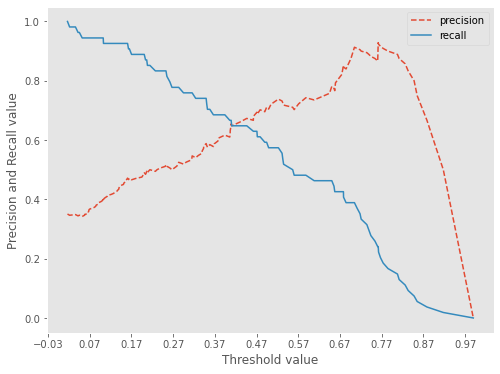

In [26]:
precision_recall_curve_plot(y_test, pred_proba)

- threshold를 0.42 정도로 낮추면 precision과 recall의 균형이 맞을 것 같다.   
- 하지만 두지표의 값이 0.7이 안될 정도로 낮다.

그 전에 원본데이터의 분포를 살펴보자.

In [27]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


- 혈당, 혈압 등에 0 value도 있다. 말이 되지 않는다.

분포를 그려본다.

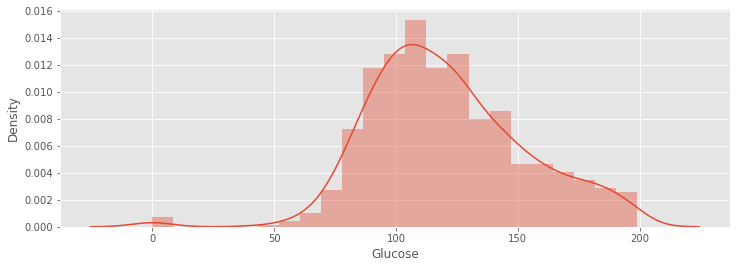

In [29]:
ax, fig = plt.subplots(figsize = (12, 4))
ax = sns.distplot(df['Glucose'])

0 값을 검사할 피처수는 다음과 같다.

In [30]:
# 0값을 검사할 피쳐 명 리스트
zero_features = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

In [31]:
# 전체 샘플 수 
total_samples = df.shape[0]

In [33]:
for feature in zero_features:
    zero_count = df[df[feature] == 0][feature].count()
    print(f'Feature: {feature}, Zero count: {zero_count}, Percentage: {100 * zero_count / total_samples}')

Feature: Glucose, Zero count: 5, Percentage: 0.6510416666666666
Feature: BloodPressure, Zero count: 35, Percentage: 4.557291666666667
Feature: SkinThickness, Zero count: 227, Percentage: 29.557291666666668
Feature: Insulin, Zero count: 374, Percentage: 48.697916666666664
Feature: BMI, Zero count: 11, Percentage: 1.4322916666666667


SkinThickness, Insulin 수치에서 0 값은 매우 많다.  
샘플 수가 얼마 안되기 때문에 이런 것들을 삭제하기 보다는 평균 값으로 대체한다.

In [34]:
df[zero_features] = df[zero_features].replace(0, df[zero_features].mean())

이제 다시 학습과 평가를 진행해본다.

In [35]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=156, stratify=y)

# StandardScaler 클래스를 이용해 피쳐 데이터 세트에 일괄적으로 스케일링 적용
scaler = StandardScaler()
X = scaler.fit_transform(X)

# 로지스틱 회귀로 학습, 예측 및 평가 수행
lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)
pred = lr_clf.predict(X_test)
pred_proba = lr_clf.predict_proba(X_test)[:, 1]

In [36]:
get_clf_eval(y_test, pred, pred_proba)

Accuracy: 0.8051948051948052
Confusion Matrix:
[[89 11]
 [19 35]]
Precision: 0.7608695652173914, Recall: 0.6481481481481481
F1: 0.7000000000000001, AUC: 0.8387037037037037


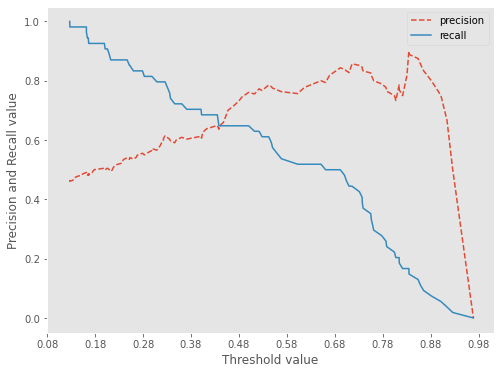

In [37]:
precision_recall_curve_plot(y_test, pred_proba)

이제 예측 임계치를 0.48로 낮추어본다.  
Binarizer는 threshold를 기준으로 0, 1을 리턴하는 클래스이다. threshold 기본값은 0.0이다.

In [38]:
binarizer = Binarizer(threshold=0.48)

pred_th_048 = binarizer.fit_transform(pred_proba.reshape(-1, 1))

In [40]:
print(pred_th_048)

[[0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]]


In [41]:
get_clf_eval(y_test, pred_th_048, pred_proba)

Accuracy: 0.7987012987012987
Confusion Matrix:
[[88 12]
 [19 35]]
Precision: 0.7446808510638298, Recall: 0.6481481481481481
F1: 0.6930693069306931, AUC: 0.8387037037037037
